# Imports

In [50]:
import numpy as np
import gzip
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Information

# Functions

In [75]:
def read_image_file(filename, images):
    width = 28
    height = 28
    N = images

    f = gzip.open(filename, 'r')
    f.read(16) # skip preamble, 16 bytes
    buffer = f.read(width * height * N) # read in "N" images as binary data
    data = np.frombuffer(buffer, dtype='uint8') # convert binary data to integers : 0 - 255
    data = data.reshape(N, width, height, 1) # reshape to Nx28x28x1 (only 1 color channel, b/w)
    f.close()
    
    return data

In [77]:
def read_label_file(filename, labels):
    N = labels
    
    f = gzip.open(filename, 'r')
    f.read(8) # skip preamble, 8 bytes
    buffer = f.read(N) # read in "N" labels as binary data
    data = np.frombuffer(buffer, dtype='uint8') # convert binary data to integers : 0 - 255
    f.close()
    
    return data

# Explore

In [84]:
X_6 = read_image_file('train-images-idx3-ubyte.gz', 6)
y_6 = read_label_file('train-labels-idx1-ubyte.gz', 6)

In [85]:
X_6.shape, y_6.shape

((6, 28, 28, 1), (6,))

In [86]:
X_6[0].shape

(28, 28, 1)

In [87]:
y_6

array([5, 0, 4, 1, 9, 2], dtype=uint8)

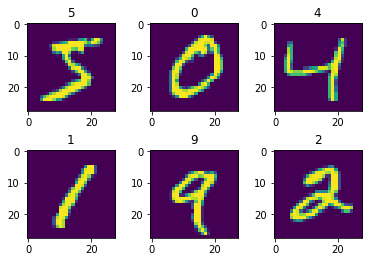

In [94]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.imshow(X_6[i-1].squeeze())
    ax.set_title(y_6[i-1])

# Data Preparation

In [110]:
X_train = read_image_file('train-images-idx3-ubyte.gz', 60_000)
y_train = read_label_file('train-labels-idx1-ubyte.gz', 60_000)
X_test = read_image_file('t10k-images-idx3-ubyte.gz', 10_000)
y_test = read_label_file('t10k-labels-idx1-ubyte.gz', 10_000)

In [111]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [112]:
X_train = X_train.reshape(60_000, 28*28)
X_test = X_test.reshape(10_000, 28*28)

In [113]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

# Training

In [115]:
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

In [116]:
knn.score(X_test, y_test)

0.9705